# Data Discoverу (Part 1):<br>Preprocessing and starting to explore data in Jupyter notebook
<a class="anchor" id="0"></a>
### Performed by Ilya Smolenskiy

In this part of our analysis, we will preprocess and explore data for further analysis and visualization in Power BI.
<br>Our data sample is [Sample - Superstore.xls](https://community.tableau.com/sfc/servlet.shepherd/document/download/0694T000001hAz2QAE) - will be uploaded further from [Tableau Community](https://community.tableau.com/s/question/0D54T00000C601sSAB/tableau-sample-questions-with-sample-superstore-data).

## It this notebook we are about to perform:
**1. [Data & libraries import](#1)**<br>
**2. [Data overview. Searching for duplicates, blank values and other anomalies in following tables of dataset:](#2)**
<br>2.1. [Orders table](#21);
<br>2.2. [People table](#22);
<br>2.3. [Returns table.](#23)<br>
**3. [Resume on the first part of Data Discovery](#3)**<br>
**4. [Export of cleansed and structured data](#4)**<br>

<a class="anchor" id="1"></a>
## 1. Data Import and overview

Firstly, we must to import libraries required for the analysis:

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import xlrd
pd.options.display.max_columns = None

Secondly, we import sample dataset - each excel sheet at a time:  

In [2]:
# configuring the path the dataset sample located in Tableau Community: 
dwn_url = 'https://community.tableau.com/sfc/servlet.shepherd/document/download/0694T000001hAz2QAE'

# importing dataset sample:
orders = pd.read_excel(dwn_url, sheet_name='Orders')
returns = pd.read_excel(dwn_url, sheet_name='Returns')
people = pd.read_excel(dwn_url, sheet_name='People')

[Back to the beginning](#1)<br>

<a class="anchor" id="2"></a>
## 2. Data overview. Searching for duplicates, blank values and other anomalies in following tables:

<a class="anchor" id="21"></a>
### 2.1 Orders table

From now we'll start observing each imported table, starting from Orders: 

In [3]:
orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


As we may see from here, table **orders** contains data about orders, broken down to single position of order, with financial, client-related, shipping-related and other additional information about each position of one's order. To make this data source more efficient I would suggest separating it into multiple different tables - we will examine the possibility of that later. In the first 5 rows of the table, we may see 'Row ID' column, that looks like index column to me. Let's reset tables index to this column:

In [4]:
orders.set_index('Row ID',
                 drop=True,
                 inplace = True
                )
orders.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


As we may see from the head of the updated table, its index grows out of sequence, let's double check, if there's any duplicates or missing values in Row ID index column: 

In [5]:
print(
'Row IDs sorted:', orders.index.sort_values().values,
'\nDuplicates:', orders.index[orders.index.duplicated() == True].values,
'\nTotal number of rows in the table:', len(orders)
)

Row IDs sorted: [   1    2    3 ... 9992 9993 9994] 
Duplicates: [] 
Total number of rows in the table: 9994


As we can see, the total number of rows in **orders** table matches the maximum value of indexes, plus we've double checked for duplicates - everting is correct. We wonder why the order of the indexes is broken, but we leave it at that for now.

Let's move on to observing types of the variables:

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 non-nu

As we may see from the above output:
- most of the variable’s types appear to be correctly identified;
- there are not blank values in the dataset.

As a matter of taste and as a part of data preprocessing I always transform names of the columns to "snake_like_names", but in our case I am not doing to do it to keep it simple for further analysis in Power BI..

Let's define our table's timeframe based on `Order Date` and `Ship Date`: 

In [7]:
for columns in ['Order Date', 'Ship Date']:
    print('The dataset captures data about {0}s committed by users from the'.format(columns[:columns.find(' ')]),
      orders[columns].dt.date.min(), 'to', orders[columns].dt.date.max(),
      '({0} days in total)'.format((orders[columns].dt.date.max()
                                      - orders[columns].dt.date.min()
                                      + pd.Timedelta(days=1)
                                     ).days
                                    )
         )

The dataset captures data about Orders committed by users from the 2011-01-04 to 2014-12-31 (1458 days in total)
The dataset captures data about Ships committed by users from the 2011-01-08 to 2015-01-06 (1460 days in total)


Once we know the timeframe, let's briefly check the data frame for absolute duplicates:

In [8]:
orders[orders.duplicated(keep = False) == True]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
3406,US-2011-150119,2011-04-23,2011-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
3407,US-2011-150119,2011-04-23,2011-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


We've caught two rows, that are fully equal to each other, let's delete the duplicate and repeat procedure, excluding `Order ID` from dataset while searching for duplicates:

In [9]:
orders = orders.drop_duplicates(keep='first')
orders[orders.drop('Order ID', axis= 1).duplicated(keep = False) == True]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,


As we may see, there are no absolute duplicates in the table anymore!

Let's briefly observe unique values of string type columns, except `Customer ID`, `Customer Name`, `Product ID`, `Product Name` - they definitely contain large numbers of unique values:

In [10]:
strcolumns = ['Ship Mode', 'Segment', 'Country', 'Region', 'State', 'City', 'Category', 'Sub-Category']

for values in strcolumns:
    print('{0}:\n'.format(values),
          orders[values].unique()
         )

Ship Mode:
 ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Segment:
 ['Consumer' 'Corporate' 'Home Office']
Country:
 ['United States']
Region:
 ['South' 'West' 'Central' 'East']
State:
 ['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']
City:
 ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan

As we may see from the list of unique values for each column/variable there are ment to interconnections between each other, such as:
- we may exclude `Country` column as it only holds one value
- column `State` looks like a subset of `Region`, whereas `City` must be a subset of `State`
- `Sub-Category` must be a subset of `Category` - both related to ordered product

Let's find out if your assumptions are correct by grouping those pairs in tables to observe those relations. For tables to be prepared to be more informative we are going to add number of orders, total sales, profits, and profit margins as aggregate functions. Let's starts with `Region` - `State` relation, and after proceed to `State` - `City`:

In [11]:
GBRegionState = orders.groupby(['Region', 'State'],
                               as_index = False)\
                      .agg(Orders = ('Order ID', 'nunique'),
                           Sales = ('Sales', 'sum'),
                           Profits = ('Profit', 'sum')
                          )
GBRegionState['Gross Margin'] = GBRegionState['Profits'] /  GBRegionState['Sales']
GBRegionState = GBRegionState.sort_values(['Region', 'Orders'],
                                          ascending = [True, False])\
                             .reset_index(drop = True)

display(GBRegionState)
print('Duplicates in States:',
      len(GBRegionState[GBRegionState['State'].duplicated() == True])
     )

,Region,State,Orders,Sales,Profits,Gross Margin
0,Central,Texas,487,170188.0458,-25729.3563,-0.151182
1,Central,Illinois,276,80166.1010,-12607.8870,-0.157272
2,Central,Michigan,117,76269.6140,24463.1876,0.320746
3,Central,Indiana,73,53555.3600,18382.9363,0.343251
4,Central,Wisconsin,53,32114.6100,8401.8004,0.261619
5,Central,Minnesota,44,29863.1500,10823.1874,0.362426
6,Central,Oklahoma,34,19683.3900,4853.9560,0.246602
7,Central,Missouri,30,22205.1500,6436.2105,0.289852
8,Central,Nebraska,23,7464.9300,2037.0942,0.272889
9,Central,Iowa,17,4579.7600,1183.8119,0.258488


Duplicates in States: 0


On the table above we may see total number of orders, amounts of sales, profits and profit margin grouped by `Region` and `State`. We may also see not duplicates in `State` column, so we may conclude grouping consistency. Let's form the same table for `State` - `City` pair:

In [12]:
GBStateCity = orders.groupby(['State', 'City'],
                             as_index = False)\
                    .agg(Orders = ('Order ID', 'nunique'),
                         Sales = ('Sales', 'sum'),
                         Profits = ('Profit', 'sum')
                        )
GBStateCity['Gross Margin'] = GBStateCity['Profits'] /  GBStateCity['Sales']
GBStateCity = GBStateCity.sort_values(['State', 'Orders'],
                                      ascending = [True, False])\
                         .reset_index(drop = True)

display(GBStateCity)
print('Duplicates in City:',
      len(GBStateCity[GBStateCity['City'].duplicated() == True])
     )

,State,City,Orders,Sales,Profits,Gross Margin
0,Alabama,Decatur,7,3374.820,1000.0881,0.296338
1,Alabama,Huntsville,7,2484.370,1005.2572,0.404633
2,Alabama,Montgomery,6,3722.730,834.6571,0.224206
3,Alabama,Mobile,4,5462.990,2175.8292,0.398285
4,Alabama,Auburn,3,1766.830,452.6071,0.256169
...,...,...,...,...,...,...
599,Wisconsin,Sheboygan,1,79.740,34.3419,0.430673
600,Wisconsin,Waukesha,1,54.500,14.1700,0.260000
601,Wisconsin,Wausau,1,317.480,90.4306,0.284839
602,Wisconsin,West Allis,1,250.480,28.3708,0.113266


Duplicates in City: 73


As we see, there are 73 cities, that have duplicates in the other state, - let's check it:

In [13]:
GBStateCity[GBStateCity['City'].duplicated(keep = False) == True][['State', 'City']].head()

,State,City
0,Alabama,Decatur
1,Alabama,Huntsville
4,Alabama,Auburn
5,Alabama,Florence
16,Arizona,Peoria


In the US, it's quite common to find cities with the same name in different states, a random check confirmed that such pairs of cities and stated exist. Let's move on to `Category` - `Sub-Category`

In [14]:
GBRegionState = orders.groupby(['Category', 'Sub-Category'],
                               as_index = False)\
                      .agg(Orders = ('Order ID', 'nunique'),
                           Sales = ('Sales', 'sum'),
                           Profits = ('Profit', 'sum')
                          )
GBRegionState['Gross Margin'] = GBRegionState['Profits'] /  GBRegionState['Sales']
GBRegionState = GBRegionState.sort_values(['Category', 'Orders'],
                                          ascending = [True, False])\
                             .reset_index(drop = True)

display(GBRegionState)
print('Duplicates in Sub-Categories:',
      len(GBRegionState[GBRegionState['Sub-Category'].duplicated() == True])
     )

,Category,Sub-Category,Orders,Sales,Profits,Gross Margin
0,Furniture,Furnishings,877,91705.1640,13059.1436,0.142404
1,Furniture,Chairs,576,328167.7310,26602.2251,0.081063
2,Furniture,Tables,307,206965.5320,-17725.4811,-0.085645
3,Furniture,Bookcases,224,114879.9963,-3472.5560,-0.030228
4,Office Supplies,Binders,1316,203412.7330,30221.7633,0.148574
5,Office Supplies,Paper,1191,78479.2060,34053.5693,0.433918
6,Office Supplies,Storage,777,223843.6080,21278.8264,0.095061
7,Office Supplies,Art,731,27118.7920,6527.7870,0.240711
8,Office Supplies,Appliances,451,107532.1610,18138.0054,0.168675
9,Office Supplies,Labels,346,12486.3120,5546.2540,0.444187


Duplicates in Sub-Categories: 0


As we may see here relation, in which `Sub-Category` is a subset of `Category` is consistent - they are mutually exclusive.

Let's form a separate **listofgoods** table and check, if `Product Name` has single combination of `Product ID`, `Product Price`, `Category` and `Sub-Category`. The price will be calculated as (`Sales` / (1 - `Discount`)) / `Quantity`:

In [15]:
orders['Product Price'] = ((orders['Sales']
                            / (1-orders['Discount'])) / orders['Quantity']).round(2)

listofgoods = orders[['Product ID',
                      'Product Name',
                      'Category',
                      'Sub-Category',
                      'Product Price']].drop_duplicates(keep = 'first')

duplicatedgoods = listofgoods[listofgoods[['Product Name',
                                           'Category',
                                           'Sub-Category',
                                           'Product Price']].duplicated(keep = False) == True]\
                                                            .sort_values('Product Name')
duplicatedgoods

,Product ID,Product Name,Category,Sub-Category,Product Price
Row ID,,,,,
986,OFF-EN-10000461,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",Office Supplies,Envelopes,8.74
1990,OFF-EN-10000781,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",Office Supplies,Envelopes,8.74
337,OFF-BI-10004140,Avery Non-Stick Binders,Office Supplies,Binders,4.49
2532,OFF-BI-10000829,Avery Non-Stick Binders,Office Supplies,Binders,4.49
1130,FUR-TA-10004086,KI Adjustable-Height Table,Furniture,Tables,85.98
1406,FUR-TA-10001039,KI Adjustable-Height Table,Furniture,Tables,85.98
6765,TEC-MA-10003230,Okidata C610n Printer,Technology,Machines,649.00
7293,TEC-MA-10001856,Okidata C610n Printer,Technology,Machines,649.00
5192,OFF-EN-10003448,"Peel & Seel Recycled Catalog Envelopes, Brown",Office Supplies,Envelopes,11.58


As we may see, some goods acquire 2 `Product ID`s with else equal variables, let's fix that by replacing duplicated IDs with unique IDs in **listofgoods** and **orders**:

In [16]:
newids = duplicatedgoods.groupby('Product Name',
                                 as_index = False)\
                        .agg(FirstID = ('Product ID', 'first'),
                             LastID = ('Product ID', 'last')
                            )
id_replacement_dict = pd.Series(newids['FirstID'].values,
                                index = newids['LastID'])\
                        .to_dict()

listofgoods = listofgoods.replace({"Product ID": id_replacement_dict})

orders = orders.replace({"Product ID": id_replacement_dict})

listofgoods = listofgoods.drop_duplicates(keep = 'first')

print("Duplicates after Product ID replacement in listofgoods table:",
      len(listofgoods[listofgoods[['Product Name',
                                   'Category',
                                   'Sub-Category',
                                   'Product Price']].duplicated(keep = False) == True].sort_values('Product Name'))
     )

Duplicates after Product ID replacement in listofgoods table: 0


Now let's see, if all `Product ID`s in **listofgoods** are unique:

In [17]:
duplicates = listofgoods[listofgoods['Product ID'].duplicated(keep = False) == True][['Product ID',
                                                                                    'Product Name']].sort_values('Product ID')
duplicates

,Product ID,Product Name
Row ID,,
2472,FUR-BO-10002213,"Sauder Forest Hills Library, Woodland Oak Finish"
2116,FUR-BO-10002213,DMI Eclipse Executive Suite Bookcases
67,FUR-CH-10001146,"Global Value Mid-Back Manager's Chair, Gray"
129,FUR-CH-10001146,"Global Task Chair, Black"
1460,FUR-FU-10001473,DAX Wood Document Frame
...,...,...
1220,TEC-PH-10002200,Samsung Galaxy Note 2
2597,TEC-PH-10002310,Plantronics Calisto P620-M USB Wireless Speake...
1379,TEC-PH-10002310,Panasonic KX T7731-B Digital phone


As we may see - no. Let's fix that by adding number 1 to the end of every duplicated `Product ID`.

In [18]:
duplicates[::2]['Product ID'] += '1'
duplicates

C:\Users\ivsmo\AppData\Local\Temp\ipykernel_18972\4163044811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates[::2]['Product ID'] += '1'


,Product ID,Product Name
Row ID,,
2472,FUR-BO-100022131,"Sauder Forest Hills Library, Woodland Oak Finish"
2116,FUR-BO-10002213,DMI Eclipse Executive Suite Bookcases
67,FUR-CH-100011461,"Global Value Mid-Back Manager's Chair, Gray"
129,FUR-CH-10001146,"Global Task Chair, Black"
1460,FUR-FU-100014731,DAX Wood Document Frame
...,...,...
1220,TEC-PH-10002200,Samsung Galaxy Note 2
2597,TEC-PH-100023101,Plantronics Calisto P620-M USB Wireless Speake...
1379,TEC-PH-10002310,Panasonic KX T7731-B Digital phone


Now, using this table as a dictionary we will replace newly generated `Product ID`s both in **listofgoods** and **orders**: 

In [19]:
listofgoods = listofgoods.merge(duplicates,
                                on = 'Product Name',
                                how = 'left',
                               )
listofgoods['Product ID'] = np.where(listofgoods['Product ID_y'].isna(),
                                     listofgoods['Product ID_x'],
                                     listofgoods['Product ID_y'],
                                    )
listofgoods = listofgoods.drop(['Product ID_x', 'Product ID_y'],
                               axis = 1,
                              )
listofgoods.head()

,Product Name,Category,Sub-Category,Product Price,Product ID
0,Bush Somerset Collection Bookcase,Furniture,Bookcases,130.98,FUR-BO-10001798
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Furniture,Chairs,243.98,FUR-CH-10000454
2,Self-Adhesive Address Labels for Typewriters b...,Office Supplies,Labels,7.31,OFF-LA-10000240
3,Bretford CR4500 Series Slim Rectangular Table,Furniture,Tables,348.21,FUR-TA-10000577
4,Eldon Fold 'N Roll Cart System,Office Supplies,Storage,13.98,OFF-ST-10000760


In [20]:
orders = orders.merge(duplicates,
                      on = 'Product Name',
                      how = 'left',
                     )
orders['Product ID'] = np.where(orders['Product ID_y'].isna(),
                                orders['Product ID_x'],
                                orders['Product ID_y'],
                               )
orders = orders.drop(['Product ID_x', 'Product ID_y'],
                     axis = 1,
                    )
orders.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Product Price,Product ID
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.98,FUR-BO-10001798
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.98,FUR-CH-10000454
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.31,OFF-LA-10000240
3,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,348.21,FUR-TA-10000577
4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,13.98,OFF-ST-10000760


In [21]:
# orders = orders.drop_duplicates(keep='first')
print("Duplicates after Product ID replacement in orders table:",
      len(orders[orders.drop('Order ID', axis = 1).duplicated(keep = False) == True])
     )

Duplicates after Product ID replacement in orders table: 0


As we may see, we've eliminated duplicates in the **listofgoods** table and checked, that no extra duplicates occurred in **orders** table, after our `Product ID` line up. Let's briefly observe numeric values of dataset:

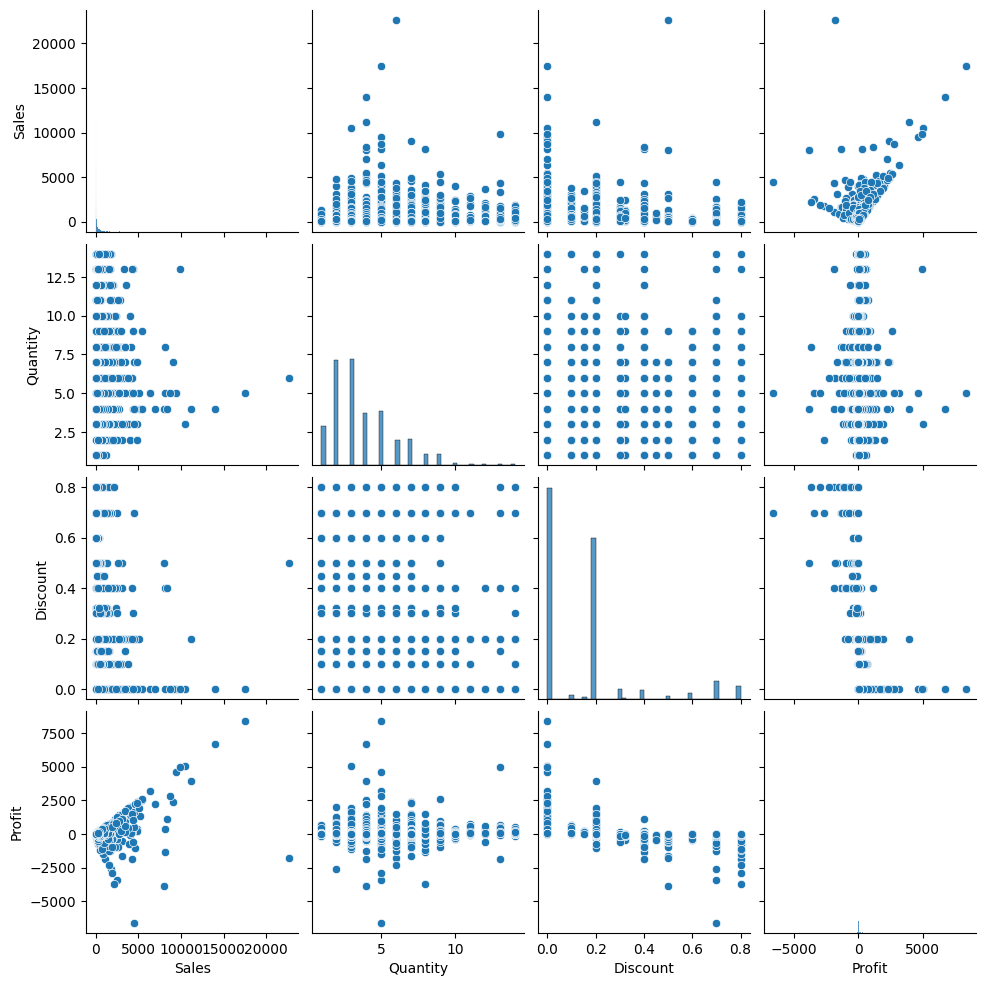

In [22]:
sns.pairplot(orders[['Sales', 'Quantity', 'Discount', 'Profit']])

From the chart above we do not see outstanding anomalies, however, we'll admire some notable features:
 - Most losses of our profit as located in zones of low bill/small sales in range between 0 and 5000
 - The higher is discount the more chance to face loss in terms of profit
 - Highest discounts appear in the lower bill/sales amount range
 - More often than not, users buy about 2-3 units of a single item
 - Most of the times discount there are no (zero discount) for a position in order

Further analysis of numeric values behaviour with is going to be performed in Power BI. Now let's overview other two tables form our dataset:

[Back to the beginning](#1)<br>

<a class="anchor" id="22"></a>
## 2.2 People table

In [23]:
people = people.set_index('Region', drop = True)

This table looks like a list of regional managers - we may easily see, that there are no duplicates or N/As here, column `Region` perfectly matches values of the same column in **orders** table, so it's a key to match tables.

Let's move on to **returns** table:

[Back to the beginning](#t1)<br>

<a class="anchor" id="23"></a>
## 2.3 Returns table

In [24]:
returns = returns.set_index('Order ID', drop = True)

Let's check for blank values and duplicates:

In [25]:
print('Blank values count:', len(returns[returns.isna()['Returned'] == True]),
     '\nDuplicates count:', len(returns[returns.duplicated(keep = False) == True]))

Blank values count: 0 
Duplicates count: 296


As we may see: no blanks or duplicates - we are good to proceed to the resume part:

[Back to the beginning](#1)<br>

<a class="anchor" id="3"></a>
## Resume on the first part of Data Discovery:

According to all previously revealed I would suggest transforming **order** table into following separate tables:
- **orders** will keep the following columns:
    - `Row ID` - primary key,
    - `Order ID` - foreign key,
    - `Order Date`,
    - `Ship Date`,
    - `Ship Mode`,
    - `Customer ID` - foreign key,
    - `Product ID` - foreign key,
    - `Sales`,
    - `Quantity`,
    - `Discount`,
    - `Profit`.
- **customers** will acquire the following columns from **orders** table:
    - `Customer ID` - primary key,
    - `Customer Name`,
    - `Segment`.
- **ordercredentials** formed with columns:
    - `Order ID` - primary key,
    - `Region` - foreign key,
    - `City`,
    - `State`,
    - `Postal Code`.
- **listofgoods** acquires columns:
    - `Product ID`- primary key,
    - `Category`,
    - `Sub-Category`,
    - `Product Name`,
    - `Product Price`.

Tables **people** and **returns** will be stored unchanged:
- **people**:
    - `Region` - primary key,
    - `Person`.
- **returns**:
    - `Order ID` - primary key
    - `Returned`.

Let's prepare those tables for export:

In [26]:
customers = orders[['Customer ID', 'Customer Name', 'Segment']].drop_duplicates(keep = 'first')\
                                                               .set_index('Customer ID',
                                                                          drop = True,
                                                                         )
ordercredentials = orders[['Order ID', 'Region', 'City', 'State', 'Postal Code']].drop_duplicates(keep = 'first')\
                                                                                 .set_index('Order ID',
                                                                                            drop = True,
                                                                                           )
listofgoods = orders[['Product ID', 'Category', 'Sub-Category', 'Product Name', 'Product Price']].drop_duplicates(keep = 'first')\
                                                                                                 .set_index('Product ID',
                                                                                                            drop = True,
                                                                                                           )
orders = orders[['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]

[Back to the beginning](#1)<br>

<a class="anchor" id="4"></a>
## Export of cleansed and structured data

In [27]:
customers.to_csv(r'~\customers.csv')
ordercredentials.to_csv(r'~\ordercredentials.csv')
listofgoods.to_csv(r'~\listofgoods.csv')
orders.to_csv(r'~\orders.csv')
people.to_csv(r'~\people.csv')
returns.to_csv(r'~\returns.csv')

In the next part we will continue exploring prepared data in Power BI:
- [listofgoods.csv](https://drive.google.com/file/d/1WKF8QSllKivN_g43yfOWirgf7WVo67Lu/view?usp=sharing)
- [cutomers.csv](https://drive.google.com/file/d/1CNHlb7Q8HW_CtrApeEAlfqH52U65iQfo/view?usp=sharing)
- [ordercredentials.csv](https://drive.google.com/file/d/1UbYUJymmq4hMVymWByZ4JSLZ15UeyXO9/view?usp=sharing)
- [orders.csv](https://drive.google.com/file/d/1bckGgcGinRC7uX2RkDqPeXEauYhZy_rb/view?usp=sharing)
- [people.csv](https://drive.google.com/file/d/13lW48YhA0w4ylN4_KDltBST2xUiS7Q6D/view?usp=sharing)
- [returns.csv](https://drive.google.com/file/d/1hVtvD7099mt-cnxhhDHnDg-vIMcP4FIZ/view?usp=sharing)

[Back to the beginning](#1)<br>